<a href="https://colab.research.google.com/github/ribeirolucas962/Modelo_de_Fraude/blob/main/modelo_previsao__fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de Machine Learning com Prevenção de Fraudes
Onde esse modelo e um trabalho apresentaso a um instituição com todas linhas de codigo conmentadas. Foi usado algumas metricas do material (Nerd dos Dados )
Conjunto de dados com mais de 80.000 registros
Analise exploratória de variáveis catagóricas e numéricas
Analise e Tratamento de nulos
Tratamento de dados
Engenharia de atributos
Gráficos
Outliers
Normalização e padronização dos dados
Balanceamento de variaveis Alvo(target)
OneHotEncoding
Crição de um modelo onde foi feito o treino e teste com 3 algoritmos diferentes(Rondom Forest, Suport Vector Machine KNN), GridSearch para ajustes de hiperparametros automáticoe treino de mias de 1.000 modelos dos pesos das melhores variáveis.



#importando as bibliotecas necessarias da modelo.

In [ ]:
# Suprime os avisos para melhor legibilidade
import warnings
warnings.filterwarnings("ignore")

# Importa a biblioteca pandas para manipulação de dados
import pandas as pd

# Importa a biblioteca matplotlib para visualização de gráficos
import matplotlib.pyplot as plt

# Importa a biblioteca seaborn para visualizações estatísticas mais atraentes
import seaborn as sns

# Importa a biblioteca time para medir o tempo de execução
import time

# Importa a biblioteca numpy para computação numérica
import numpy as np

# Importa os classificadores RandomForestClassifier, SVC e KNeighborsClassifier do pacote sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importa as ferramentas GridSearchCV, train_test_split, LabelEncoder e SMOTE do pacote sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
# Importa o MinMaxScaler e a métrica r2_score do pacote sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Configurações para exibição do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Formatação para exibição de números float no pandas
pd.options.display.float_format = '{:.2f}'.format


#Lendo o Data Frame

In [ ]:
# Lê o arquivo CSV "dados_coletados10k.csv" e armazena seu conteúdo em um DataFrame chamado df_original
df_original=pd.read_csv("/content/dados_coletados10k.csv")

#Observando o tamanho dos dados usando.shape

In [ ]:
# Retorna a forma (número de linhas e colunas) do DataFrame df_original
df_original.shape

(9517, 24)

#visualizando o conjunto de dados

In [ ]:
# Esta linha mostra as primeiras 10 linhas do DataFrame df_original.
df_original.head(10)

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322068935715,43,M,5800.00,SP,23.00,200,2022-08-01,193,80000.00,92000.00,15,9,1,0,DIVORCIADO,Nenhum,N,0.00,0,NaN,91759.97,7717.08,Nao
1,322068936715,22,M,2000.00,MG,20.00,100,2022-08-01,89,50000.00,57500.00,10,10,0,0,SOLTEIRO(A),NaN,N,0.00,4,103.00,53981.18,6756.59,Nao
2,322068938715,35,M,4000.00,BA,18.00,100,2022-08-01,85,100000.00,115000.00,15,5,1,0,CASADO (A),NaN,N,0.00,0,NaN,101150.02,17929.06,Nao
3,322068939715,20,M,1800.00,MG,20.00,100,2022-08-01,89,30000.00,34500.00,1,1,0,0,SOLTEIRO(A),NaN,N,0.00,13,376.00,36208.10,369.10,Sim
4,322068940715,53,M,2800.00,MG,20.00,100,2022-08-01,87,60000.00,69000.00,16,16,0,0,CASADO (A),NaN,N,0.00,0,NaN,60984.00,11845.24,Nao
5,322068943715,50,M,2000.00,BA,20.00,100,2022-08-01,85,30000.00,34500.00,13,1,10,1,SOLTEIRO(A),NaN,N,0.00,2,41.00,31602.57,4820.29,Nao
6,322068944715,39,M,5000.00,RJ,20.00,100,2022-08-08,85,30000.00,34500.00,10,6,4,1,CASADO (A),NaN,N,0.00,5,133.00,32703.35,3723.82,Nao
7,322068945715,44,M,2500.00,MG,21.00,36,2022-08-01,35,16000.00,18400.00,1,1,0,2,SOLTEIRO(A),Nenhum,N,0.00,14,406.00,13357.65,6628.64,Sim
8,322068947715,63,M,10000.00,MA,18.00,40,2022-08-08,45,50000.00,57500.00,15,12,1,0,CASADO (A),NaN,N,0.00,0,NaN,37499.99,22720.80,Nao
9,322068948715,31,M,3000.00,SP,20.00,100,2022-08-01,85,40000.00,46000.00,13,13,0,2,CASADO (A),NaN,N,0.00,0,NaN,25781.16,22671.67,Nao


#Avaliando o periodo de coletas dos dados

In [ ]:
# Esta linha converte a coluna 'Data_Contratacao' do DataFrame df_original em formato datetime e extrai apenas a parte da data.
# Em seguida, encontra a data mínima nesta coluna.
inicio = pd.to_datetime(df_original['Data_Contratacao']).dt.date.min()
# Esta linha faz basicamente a mesma coisa que a anterior, mas encontra a data máxima em vez da mínima.
fim = pd.to_datetime(df_original['Data_Contratacao']).dt.date.max()
# Esta linha imprime uma mensagem indicando o período dos dados, usando as datas mínima e máxima encontradas anteriormente.
print('Periodo dos dados - De:', inicio, 'Ate:', fim)

Periodo dos dados - De: 2022-07-04 Ate: 2022-12-20


# Verificando o Data Frame para ver as quantidade nulos usando .sum

In [ ]:
# Esta linha verifica se há valores nulos em cada coluna do DataFrame df_original e retorna a contagem de valores nulos em cada coluna.
# O método isnull() retorna um DataFrame booleano onde True indica a presença de um valor nulo e False indica que o valor não é nulo.
# O método sum() é então aplicado a esse DataFrame booleano, somando o número de True em cada coluna, o que representa a contagem de valores nulos em cada coluna.
df_original.isnull().sum()

Contrato                               0
Idade                                  0
Sexo                                   0
Valor_Renda                            0
UF_Cliente                             0
Perc_Juros                             0
Prazo_Emprestimo                       0
Data_Contratacao                       0
Prazo_Restante                         0
VL_Emprestimo                          0
VL_Emprestimo_ComJuros                 0
QT_Total_Parcelas_Pagas                0
QT_Total_Parcelas_Pagas_EmDia          0
QT_Total_Parcelas_Pagas_EmAtraso       0
Qt_Renegociacao                        0
Estado_Civil                           0
Escolaridade                        7105
Possui_Patrimonio                      0
VL_Patrimonio                          0
QT_Parcelas_Atraso                     0
QT_Dias_Atraso                      3594
Saldo_Devedor                          0
Total_Pago                             0
Possivel_Fraude                        0
dtype: int64

#Informaçoes básicas sobre tipos de variáveis

In [ ]:
# Esta linha exibe informações detalhadas sobre o DataFrame df_original.
# O método info() fornece um resumo do DataFrame, incluindo o tipo de dados de cada coluna, o número de entradas não nulas e a quantidade de memória usada pelo DataFrame.
# O parâmetro verbose=True garante que todas as colunas sejam exibidas, mesmo que isso resulte em uma saída mais longa.
df_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          9517 non-null   int64  
 1   Idade                             9517 non-null   int64  
 2   Sexo                              9517 non-null   object 
 3   Valor_Renda                       9517 non-null   float64
 4   UF_Cliente                        9517 non-null   object 
 5   Perc_Juros                        9517 non-null   float64
 6   Prazo_Emprestimo                  9517 non-null   int64  
 7   Data_Contratacao                  9517 non-null   object 
 8   Prazo_Restante                    9517 non-null   int64  
 9   VL_Emprestimo                     9517 non-null   float64
 10  VL_Emprestimo_ComJuros            9517 non-null   float64
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64  
 12  QT_Tot

#Feito um for para mostar os valores distintos

In [ ]:
# Cria uma lista vazia para armazenar o número de valores únicos em cada coluna
valores_unicos = []
# Itera sobre as primeiras 24 colunas do DataFrame df_original
for i in df_original.columns[0:24].tolist():
  # Imprime o nome da coluna e o número de valores únicos nela
  print(i, ':', len(df_original[i].astype(str).value_counts()))
  # Calcula o número de valores únicos na coluna, convertendo-a para o tipo de dado string para garantir que todos os valores sejam contados
  valores_unicos.append(len(df_original[i].astype(str).value_counts()))

Contrato : 9517
Idade : 74
Sexo : 2
Valor_Renda : 855
UF_Cliente : 27
Perc_Juros : 21
Prazo_Emprestimo : 36
Data_Contratacao : 110
Prazo_Restante : 79
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 6
Escolaridade : 6
Possui_Patrimonio : 2
VL_Patrimonio : 3
QT_Parcelas_Atraso : 16
QT_Dias_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Possivel_Fraude : 2


#Visualização das Medidas Estatistica

In [ ]:
# O método describe() calcula estatísticas descritivas como contagem, média, desvio padrão, mínimo, quartis e máximo para cada coluna numérica.
df_original.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,5923.00,9517.00,9517.00
mean,322078158460.93,38.74,8325.40,19.65,107.43,104.58,81881.89,94164.17,7.89,4.11,1.60,1.24,10.93,5.35,249.79,90560.27,8166.21
std,5434160.86,12.67,121862.06,3.82,62.49,68.57,94138.06,108258.77,5.17,4.04,2.31,1.17,1025.26,5.32,123.22,111050.54,16697.76
min,322068935715.00,6.00,450.00,7.00,15.00,0.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,322073331715.00,29.00,2300.00,18.00,60.00,51.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,0.00,162.00,18546.85,1202.04
50%,322078461715.00,37.00,3400.00,20.00,80.00,80.00,50000.00,57500.00,9.00,2.00,1.00,1.00,0.00,4.00,284.00,45375.30,3949.91
75%,322082622715.00,46.00,5000.00,22.00,190.00,185.00,100000.00,115000.00,13.00,6.00,2.00,2.00,0.00,11.00,344.00,119721.25,8302.01
max,322087622715.00,91.00,8000080.00,28.00,240.00,227.00,500000.00,575000.00,35.00,35.00,14.00,9.00,100000.00,15.00,435.00,625000.00,396385.00


#Avaliando o Maior e o Menor Valor de Renda

In [ ]:
# O método max() retorna o maior valor na coluna 'Valor_Renda'.
print("Maior Renda", df_original['Valor_Renda'].max())
# O método min() retorna o menor valor na coluna 'Valor_Renda'.
print("Menor Renda",df_original['Valor_Renda'].min())

Maior Renda 8000080.0
Menor Renda 450.0


#Avaliando a Quantidade de Dias em Atraso

In [ ]:
# O método max() retorna o maior valor na coluna 'QT_Dias_Atraso'.
print("Maior quantidade de dias em atraso", df_original['QT_Dias_Atraso'].max())
# O método min() retorna o menor valor na coluna 'QT_Dias_Atraso'.
print("Menor quantidade de dias em atraso",df_original['QT_Dias_Atraso'].min())

Maior quantidade de dias em atraso 435.0
Menor quantidade de dias em atraso 11.0


#Avaliando o Maior e o Menor Praso Pestante

In [ ]:
# O método max() retorna o maior valor na coluna 'Prazo_Restante'.
print("Maior quantidade de dias em atraso", df_original['Prazo_Restante'].max())
# O método min() retorna o menor valor na coluna 'Prazo_Restante'.
print("Menor quantidade de dias em atraso",df_original['Prazo_Restante'].min())

Maior quantidade de dias em atraso 227
Menor quantidade de dias em atraso 0


#Agrupando Quantidade de Dias em Atraso

In [ ]:
# O método groupby() é usado para agrupar os dados com base nos valores únicos da coluna 'QT_Dias_Atraso'.
# Em seguida, o método size() é aplicado para contar o número de ocorrências de cada valor agrupado.
df_original.groupby(["QT_Dias_Atraso"]).size()

QT_Dias_Atraso
11.00     532
41.00     255
71.00     190
103.00    205
133.00    176
162.00    206
194.00    241
225.00    352
251.00    471
284.00    546
315.00    718
344.00    930
376.00    686
406.00    413
435.00      2
dtype: int64

#Praso Restante

In [ ]:
#Este código agrupa as linhas do DataFrame df_original com base nos valores da coluna
#'Prazo_Restante' e, em seguida, conta o número de ocorrências de cada valor..
df_original.groupby(["Prazo_Restante"]).size()

Prazo_Restante
0        2
3        3
4        2
6       22
7       29
8       31
9        8
10      12
11      32
12       6
13      94
15      10
16      42
17      85
18      27
19     143
20      23
23     164
25      84
27      38
28      52
29      71
30      51
31      71
33      40
34      67
35     168
36     204
37      31
38      55
39      22
40      73
41      37
42      14
43      27
44     126
45      19
46       2
49     145
50      19
51     256
53     150
59       7
60     178
64     421
66      43
68     330
71     270
74     304
75     193
76      99
77      67
78      63
79      86
80     188
82     159
84      48
85      72
87     129
89     420
91     705
100     15
107     43
120     24
125     68
129     44
133     25
143    197
149     16
156     39
159     58
175    119
179     27
185    332
193    764
198    337
221     17
225    534
227    519
dtype: int64

#Agrupando Quantidade de Cliente por Sexo

In [ ]:
#Este código está agrupando o DataFrame df_original pela coluna "Sexo" e depois retornando
#o tamanho de cada grupo. Basicamente, conta o número de ocorrências de cada valor único na coluna "Sexo".
df_original.groupby(["Sexo"]).size()

Sexo
F    3811
M    5706
dtype: int64

#Agrupando Quantidade de Cliente por Estado

In [ ]:
#O código df_original.groupby(["UF_Cliente"]).size() está agrupando os dados do
#DataFrame df_original pela coluna "UF_Cliente" e, em seguida, retornando o tamanho de cada grupo.
df_original.groupby(["UF_Cliente"]).size()

UF_Cliente
AC       1
AL      79
AM       2
AP       5
BA     883
CE     248
DF      46
ES      49
GO     485
MA     403
MG    1637
MS     238
MT     137
PA     420
PB     154
PE     263
PI     104
PR     693
RJ     335
RN      78
RO      16
RR       4
RS     407
SC     298
SE      45
SP    2468
TO      19
dtype: int64

#Agrupando Quantidade de Cliente por Idade

In [ ]:
#O código df_original.groupby(["Idade"]).size() está agrupando os dados do DataFrame
#df_original pela coluna "Idade" e, em seguida, retornando o tamanho de cada grupo.
df_original.groupby(["Idade"]).size()

Idade
6       1
17      4
18      6
19    109
20    207
21    193
22    173
23    234
24    251
25    253
26    296
27    277
28    280
29    298
30    284
31    281
32    288
33    273
34    310
35    336
36    280
37    262
38    271
39    270
40    264
41    270
42    243
43    233
44    285
45    229
46    208
47    177
48    167
49    172
50    148
51    143
52    118
53    122
54    124
55    124
56     96
57     76
58     90
59     79
60     99
61     71
62     56
63     49
64     54
65     37
66     65
67     39
68     48
69     33
70     27
71     16
72     19
73     16
74     16
75      7
76     12
77      5
78      5
79      3
80      9
81      5
82      3
83      4
84      2
85      5
87      2
88      2
90      2
91      1
dtype: int64

#Agrupando Quantidade de cliente por Estado Civil

In [ ]:
#O código df_original.groupby(["Estado_Civil"]).size() está agrupando os dados do
#DataFrame df_original pela coluna "Estado_Civil".
df_original.groupby(["Estado_Civil"]).size()

Estado_Civil
CASADO (A)       3027
DIVORCIADO        481
OUTRO             652
SOLTEIRO(A)      5087
UNIÃO ESTAVEL     130
VIÚVO(A)          140
dtype: int64

#Agrupando Por Ecolaridade

In [ ]:
#O código df_original.groupby(["Escolaridade"]).size() está agrupando os dados do
#DataFrame df_original pela coluna "Escolaridade".
df_original.groupby(["Escolaridade"]).size()

Escolaridade
Ensino Fundamental                        18
Ensino Médio                             129
Ensino Superior                           74
Nenhum                                  2184
Pós Graduação / Mestrado / Doutorado       7
dtype: int64

#Agrupando por Possuir Patrimonio

In [ ]:
#O código df_original.groupby(["Possui_Patrimonio"]).size() está agrupando os dados do
#DataFrame df_original pela coluna "Possui_Patrimonio".
df_original.groupby(["Possui_Patrimonio"]).size()

Possui_Patrimonio
N    9452
S      65
dtype: int64

#Valor de Patrimovio

In [ ]:
#O código df_original.groupby(["VL_Patrimonio"]).size() está agrupando os dados do
#DataFrame df_original pela coluna "VL_Patrimonio".
df_original.groupby(["VL_Patrimonio"]).size()

VL_Patrimonio
0.00         9512
1000.00         4
100000.00       1
dtype: int64

# A Variavel Possivel_Fraude e a Variavel vai ser usada com TARGET_ALVO
Considerando usar a variável "Possivel_Fraude" como alvo (target) para modelagem, é importante entender a distribuição dessa variável no seu conjunto de dados.Contando o número de ocorrências para cada categoria de "Possivel_Fraude", o que é útil para entender como as classes estão distribuídas. Isso é crucial para avaliar a balanceamento das classes, o que pode afetar a escolha e a avaliação do desempenho do modelo. Um passo importante para entender a distribuição da sua variável alvo, que é fundamental para uma modelagem eficaz.

In [ ]:
df_original.groupby(["Possivel_Fraude"]).size()

Possivel_Fraude
Nao    5035
Sim    4482
dtype: int64

#Tratamentos dos Dados

In [ ]:
# Substitui o valor 'NENHUM' por 'OUTRO' na coluna 'Estado_Civil'
df_original['Estado_Civil']= df_original['Estado_Civil'].replace(['NENHUM'], 'OUTRO')
# Substitui o valor 'UNIÃO ESTAVEL' por 'CASADO (A)' na coluna 'Estado_Civil'
df_original['Estado_Civil']= df_original['Estado_Civil'].replace(['UNIÃO ESTAVEL'], 'CASADO (A)')
# Agrupa o DataFrame pelo valor na coluna 'Estado_Civil' e conta a quantidade de ocorrências de cada valor
df_original.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)     3157
DIVORCIADO      481
OUTRO           652
SOLTEIRO(A)    5087
VIÚVO(A)        140
dtype: int64

#Criando uma Coluna Faixa Etaria por Clientes  

In [ ]:
# Definindo os intervalos de idade e os rótulos das faixas etárias
bins=[0, 21, 30, 40, 50, 60, 100]
labels=['Até 21 anos','De 22 até 30 anos','De 31 até 40 anos','De 41 atè 50','DE 51 até 60','Acima de 60 Anos']
# Criando a nova coluna 'Faixa_Etaria' com base nos intervalos de idade
df_original['Faixa_Etaria']= pd.cut(df_original['Idade'], bins=bins, labels=labels)
# Agrupando o DataFrame pela nova coluna 'Faixa_Etaria' e contando a quantidade de ocorrências em cada faixa etária
df_original.groupby('Faixa_Etaria').size()

Faixa_Etaria
Até 21 anos           520
De 22 até 30 anos    2346
De 31 até 40 anos    2835
De 41 atè 50         2132
DE 51 até 60         1071
Acima de 60 Anos      613
dtype: int64

Criando uma coluna por faixa salarial para ser usanda em um modelo preditivo

In [ ]:
# Definindo os intervalos de salário e os rótulos das faixas salariais
bins=[-100, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000, 9000000000]
labels = ['Até 1k','De 1k até 2k','De 2k Até 3k','De 3k Até 5k','De 5k Até 10k','DE 10k Até 20k', 'De 20 Até 30k', 'De 30 Até 50k', ' Acima de 50k']
#Criando a nova coluna 'Faixa_Salarial' com base nos intervalos de salário
df_original['Faixa_Salarial'] = pd.cut(df_original['Valor_Renda'], bins=bins, labels=labels)
# Agrupando o DataFrame pela nova coluna 'Faixa_Salarial' e contando a quantidade de ocorrências em cada faixa salarial
df_original.groupby(['Faixa_Salarial']).size()

Faixa_Salarial
Até 1k              19
De 1k até 2k      2012
De 2k Até 3k      2522
De 3k Até 5k      2646
De 5k Até 10k     1574
DE 10k Até 20k     488
De 20 Até 30k      137
De 30 Até 50k       58
 Acima de 50k       61
dtype: int64

#Olhando a Mediana para Prencher os Valores Nulos
É importante tratar os valores nulos das variáveis antes de desenvolvermos nosso modelo. Uma abordagem útil é utilizar a mediana para preencher os valores nulos. Isso ajuda a garantir que não haja distorção significativa nos dados devido à presença de valores ausentes. Portanto, ao lidar com dados faltantes, considerar a mediana como uma estratégia para preenchimento pode contribuir para uma análise mais precisa e robusta.

In [ ]:
#Essa linha de código retorna o valor da mediana dos dias de atraso presentes na coluna 'QT_Dias_Atraso' do
#DataFrame df_original. Isso é ser útil para entender o padrão central dos dias de atraso e pode ser
#usado para preencher valores nulos ou para análise estatística.
df_original['QT_Dias_Atraso'].median()

284.0

In [ ]:
# Preenchemento dos valores nulos na coluna 'QT_Dias_Atraso' com a mediana dos valores existentes nessa coluna.
df_original['QT_Dias_Atraso']=df_original['QT_Dias_Atraso'].fillna ((df_original['QT_Dias_Atraso'].median()))

#Criando Faixa Etaria de Dias em Atraso da Cota para Modelo Preditivo

Essa faixa etária é criada para categorizar diferentes faixas de dias em atraso, prazo de empréstimo e prazo restante, permitindo uma análise mais detalhada dessas variáveis usando o bins.

In [ ]:
bins = [-100, 30, 60, 90, 180, 240, 360, 500]
labels = ['Até 30 dias', 'De 31 até 60', 'De 61 até 90', 'De 91 até 180', 'De 181 até 240','De 241 até 360', 'Acima de 360']
df_original['Faixa_Dias_Atraso'] = pd.cut(df_original['QT_Dias_Atraso'], bins=bins, labels=labels)
df_original.groupby(['Faixa_Dias_Atraso']).size()

Faixa_Dias_Atraso
Até 30 dias        532
De 31 até 60       255
De 61 até 90       190
De 91 até 180      587
De 181 até 240     593
De 241 até 360    6259
Acima de 360      1101
dtype: int64

In [ ]:
bins = [0, 60, 120, 200, 720]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df_original['Faixa_Prazo_Emprestimo'] = pd.cut(df_original['Prazo_Emprestimo'], bins=bins, labels=labels)
pd.value_counts(df_original.Faixa_Prazo_Emprestimo)

De 61 até 120 Meses     3567
Até 60 Meses            2955
De 121 até 200 Meses    2814
Acima de 200 Meses       181
Name: Faixa_Prazo_Emprestimo, dtype: int64

In [ ]:
bins = [-1, 60, 120, 200, 500]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df_original['Faixa_Prazo_Restante'] = pd.cut(df_original['Prazo_Restante'], bins=bins, labels=labels)
pd.value_counts(df_original.Faixa_Prazo_Restante)

De 61 até 120 Meses     3679
Até 60 Meses            2742
De 121 até 200 Meses    2026
Acima de 200 Meses      1070
Name: Faixa_Prazo_Restante, dtype: int64

#Criando Graficos para ficar mais claro os tratamentos de dados em formas de graficos.


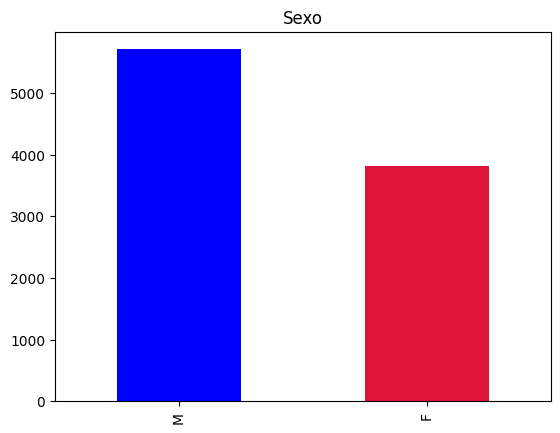

In [ ]:
df_original.Sexo.value_counts().plot(kind='bar', title='Sexo',color=['#0000FF','#DC143C']);

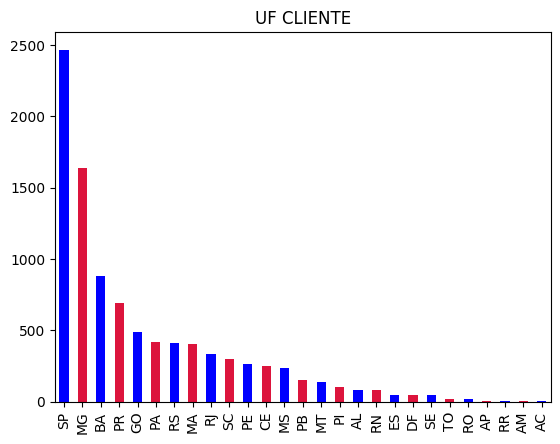

In [ ]:
df_original.UF_Cliente.value_counts().plot(kind='bar', title='UF CLIENTE',color=['#0000FF','#DC143C']);

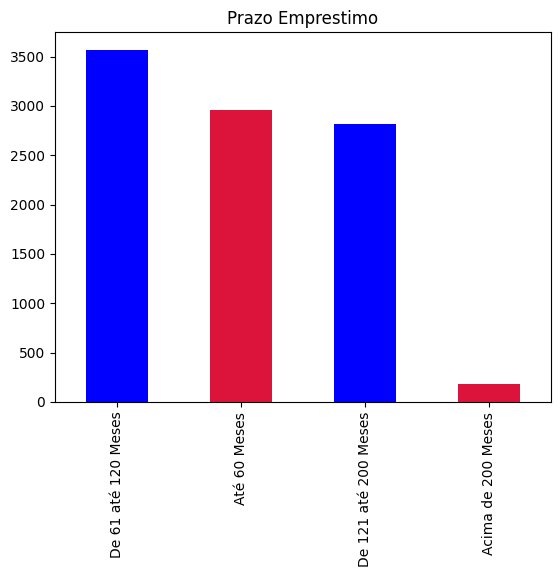

In [ ]:
df_original.Faixa_Prazo_Emprestimo.value_counts().plot(kind='bar', title='Prazo Emprestimo',color=['#0000FF','#DC143C']);

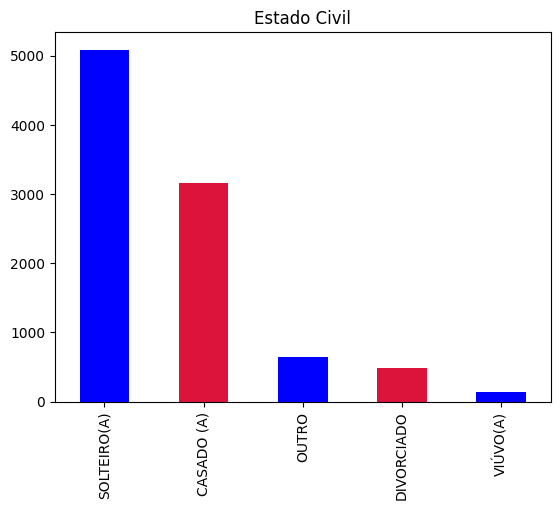

In [ ]:
df_original.Estado_Civil.value_counts().plot(kind='bar', title='Estado Civil',color=['#0000FF','#DC143C']);

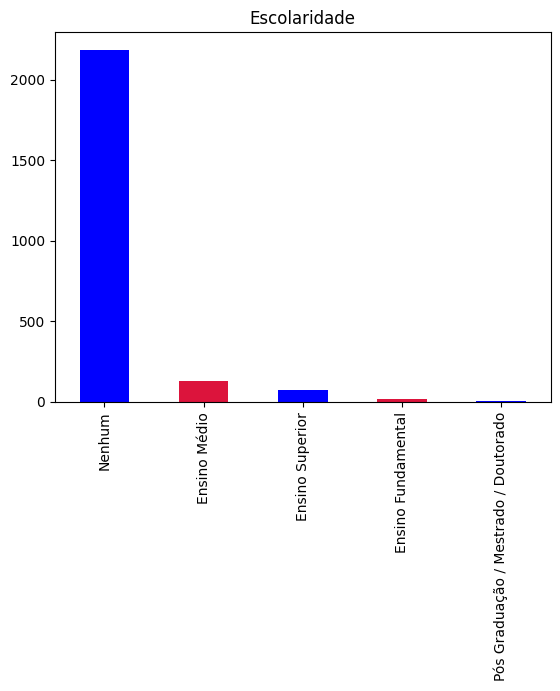

In [ ]:
df_original.Escolaridade.value_counts().plot(kind='bar', title='Escolaridade',color=['#0000FF','#DC143C']);

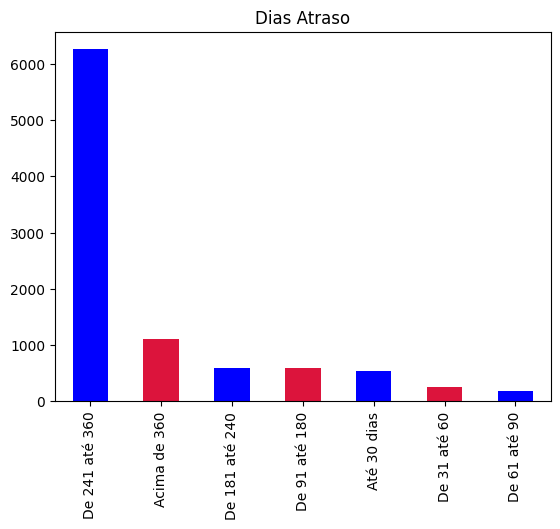

In [ ]:
df_original.Faixa_Dias_Atraso.value_counts().plot(kind='bar', title='Dias Atraso',color=['#0000FF','#DC143C']);

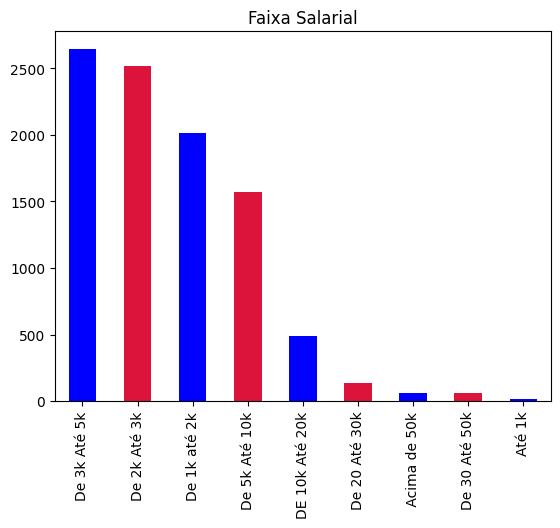

In [ ]:
df_original.Faixa_Salarial.value_counts().plot(kind='bar', title='Faixa Salarial',color=['#0000FF','#DC143C']);

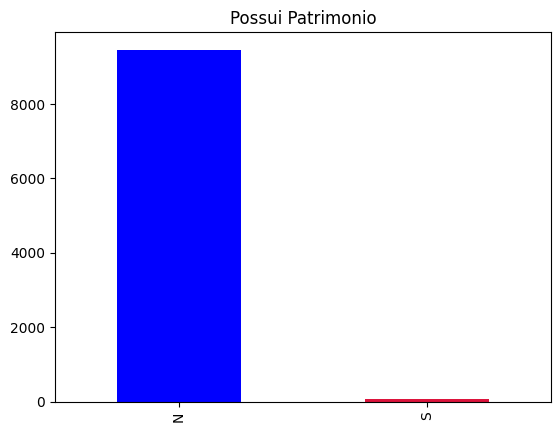

In [ ]:
df_original.Possui_Patrimonio.value_counts().plot(kind='bar', title='Possui Patrimonio',color=['#0000FF','#DC143C']);

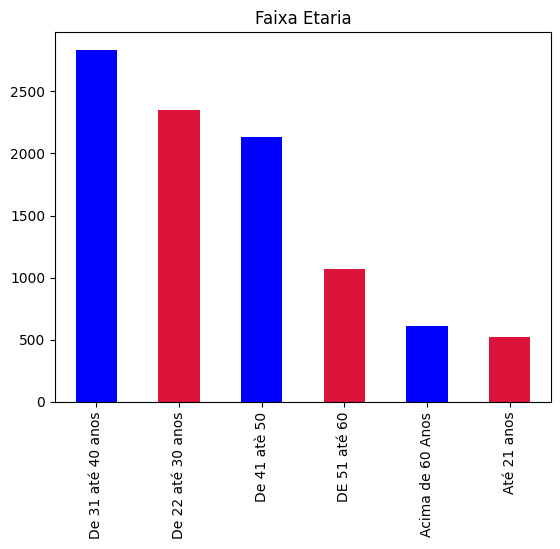

In [ ]:
df_original.Faixa_Etaria.value_counts().plot(kind='bar', title='Faixa Etaria',color=['#0000FF','#DC143C']);

#ANALISANDO COMO A VARIAREL ALVO ESTA COM SUAS DESTRIBUIÇÃO

<Axes: title={'center': 'Possíveis Fraudes'}>

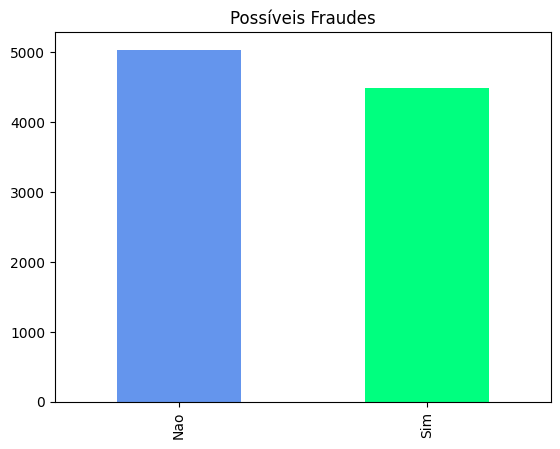

In [ ]:
df_original.Possivel_Fraude.value_counts().plot(kind='bar',
title='Possíveis Fraudes', color=['#6495ED','#00FF7F'])

#ANALISANDO COMO A VARIAREL ALVO ESTA DISTRIBUIDA POR %

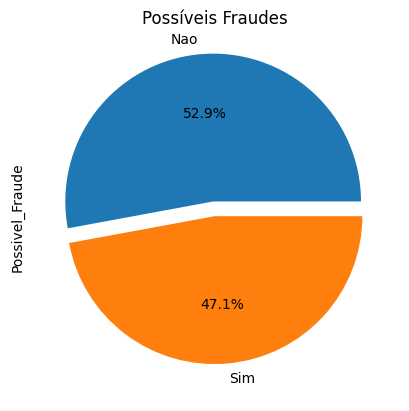

In [ ]:
df_original.Possivel_Fraude.value_counts().plot(kind='pie',
title='Possíveis Fraudes', autopct='%1.1f%%', explode=[0.1, 0]);

# Vamos visualizar novamente como está nosso DataFrame original após a engenharia de atributos

In [ ]:
df_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Contrato                          9517 non-null   int64   
 1   Idade                             9517 non-null   int64   
 2   Sexo                              9517 non-null   object  
 3   Valor_Renda                       9517 non-null   float64 
 4   UF_Cliente                        9517 non-null   object  
 5   Perc_Juros                        9517 non-null   float64 
 6   Prazo_Emprestimo                  9517 non-null   int64   
 7   Data_Contratacao                  9517 non-null   object  
 8   Prazo_Restante                    9517 non-null   int64   
 9   VL_Emprestimo                     9517 non-null   float64 
 10  VL_Emprestimo_ComJuros            9517 non-null   float64 
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64 

#Selecionando as colunas que iremos utiliza e algumas descartar.  

In [ ]:
df_original.columns

Index(['Contrato', 'Idade', 'Sexo', 'Valor_Renda', 'UF_Cliente', 'Perc_Juros',
       'Prazo_Emprestimo', 'Data_Contratacao', 'Prazo_Restante',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'Escolaridade', 'Possui_Patrimonio',
       'VL_Patrimonio', 'QT_Parcelas_Atraso', 'QT_Dias_Atraso',
       'Saldo_Devedor', 'Total_Pago', 'Possivel_Fraude', 'Faixa_Etaria',
       'Faixa_Salarial', 'Faixa_Dias_Atraso', 'Faixa_Prazo_Emprestimo',
       'Faixa_Prazo_Restante'],
      dtype='object')

# APÓS ANALISE INICIAL QUE REALIZAMOS ACIMA, ENTENDEMOSO QUE ALGUMAS VARIÁVEIS NÃO POSSUEM RELEVANCIA.
Contrato --> Essa variável é a identificação de cada cliente
Data_Contratacao, VL_Patrimonio, Possui_Patrimonio, Escolaridade, Idade --> Essas não irão ter relevancia no modelo
Valor_Renda, Prazo_Emprestimo, QT_Dias_Atraso, Prazo_Restante --> Essas variáveis já transformamos em categoria.

In [ ]:
columms=['Sexo', 'UF_Cliente', 'Perc_Juros',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'QT_Parcelas_Atraso', 'Saldo_Devedor',
       'Total_Pago', 'Faixa_Prazo_Restante', 'Faixa_Salarial', 'Faixa_Prazo_Emprestimo', 'Faixa_Etaria',
       'Faixa_Dias_Atraso', 'Possivel_Fraude']
df_dados = pd.DataFrame(df_original, columns=columms)

In [ ]:
df_dados.shape

(9517, 19)

In [ ]:
df_dados.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Sexo                              9517 non-null   object  
 1   UF_Cliente                        9517 non-null   object  
 2   Perc_Juros                        9517 non-null   float64 
 3   VL_Emprestimo                     9517 non-null   float64 
 4   VL_Emprestimo_ComJuros            9517 non-null   float64 
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64   
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64   
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64   
 8   Qt_Renegociacao                   9517 non-null   int64   
 9   Estado_Civil                      9517 non-null   object  
 10  QT_Parcelas_Atraso                9517 non-null   int64   
 11  Saldo_Devedor                     9517 non-null   float6

In [ ]:
df_dados.isnull().sum()

Sexo                                0
UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
Estado_Civil                        0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Prazo_Restante                0
Faixa_Salarial                      0
Faixa_Prazo_Emprestimo              0
Faixa_Etaria                        0
Faixa_Dias_Atraso                   0
Possivel_Fraude                     0
dtype: int64

#Analise Exploratótia em Variaveis Categóricas.
Nessa etapa temos 2 objetivos:

1º = Conhecer como a variável alvo(POSSIVEL_FRAUDE) está relacionada com as outras variáveis.

2º = Sera avaliado as variáveis categóricas para conhecimento dos dadoas e descatar variáveis que naão fazem sentido.


In [ ]:
# Ajustando o tamanho dos gráficos
plt.rcParams['figure.figsize']=[10.00, 4.00]
plt.rcParams['figure.autolayout']=True

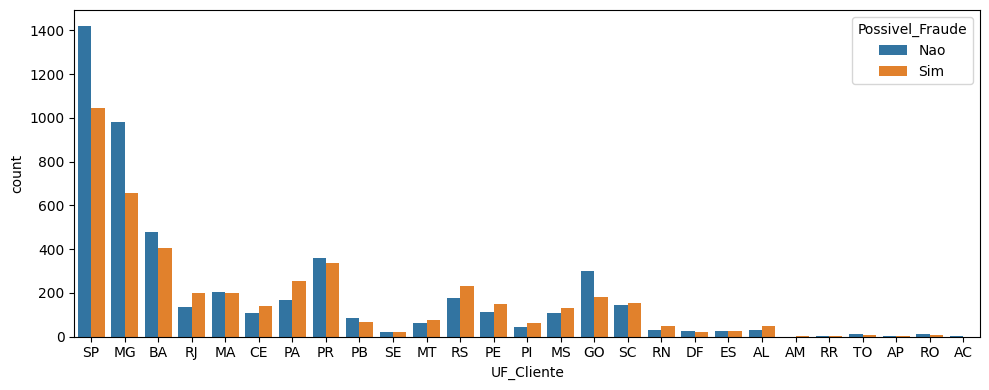

In [ ]:
#Podemos constatar na analise que não há discrepancias nestas variaveis.
sns.countplot(data= df_dados, x='UF_Cliente', hue='Possivel_Fraude');

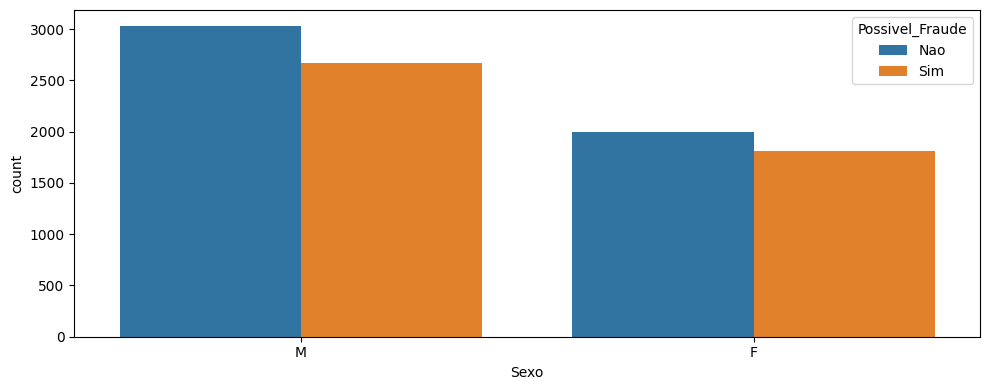

In [ ]:
#Podemos constatar na analise que não há discrepancias nestas variaveis.
sns.countplot(data= df_dados, x='Sexo', hue='Possivel_Fraude');

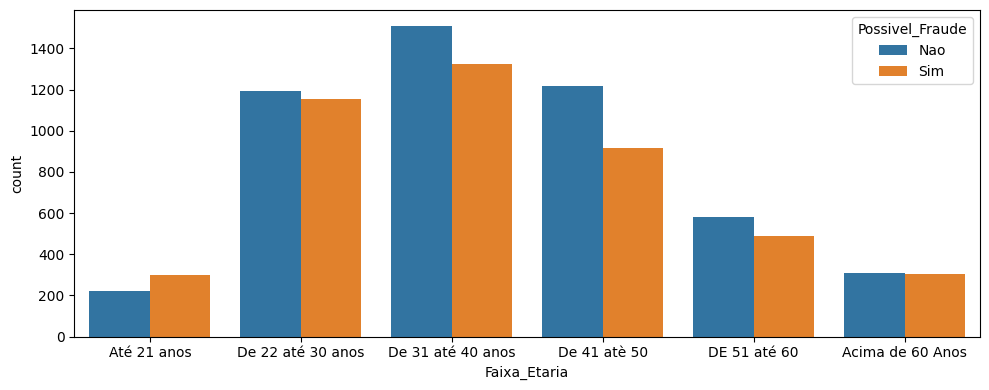

In [ ]:
#Podemos constatar na analise que não há discrepancias nestas variaveis.
sns.countplot(data= df_dados, x='Faixa_Etaria', hue='Possivel_Fraude');

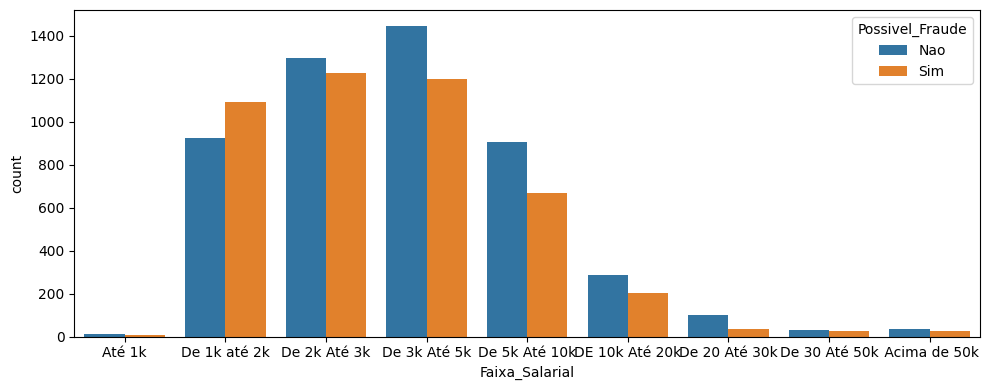

In [ ]:
#Podemos constatar na analise que não há discrepancias nestas variaveis.
sns.countplot(data= df_dados, x='Faixa_Salarial', hue='Possivel_Fraude');

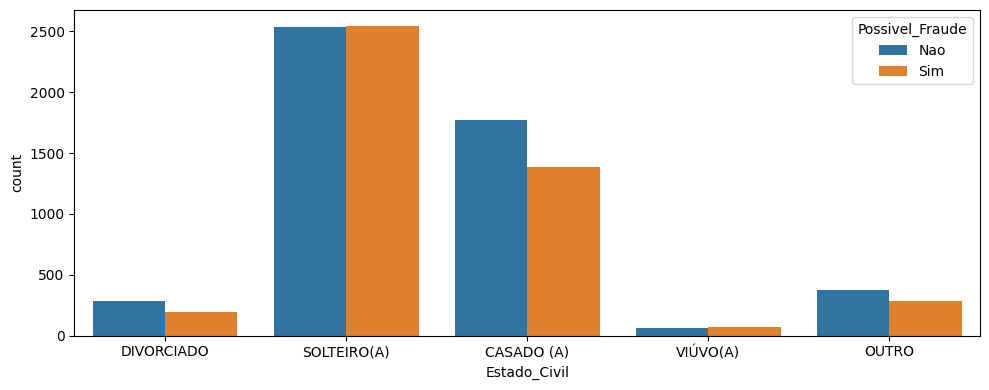

In [ ]:
#Neste caso como há muitos casos de ESTADO CIVIL diferente de Casado(C) e Solteiro(S), irei fazer um tratamento mais adiante
#para todos casos que não forem Casado e Solteiro, serão considerado como OUTROS. Dessa forma teremos somente 3 categorias
#e os dados ficarão balanceados sem discrepancias.
sns.countplot(data= df_dados, x='Estado_Civil', hue='Possivel_Fraude');

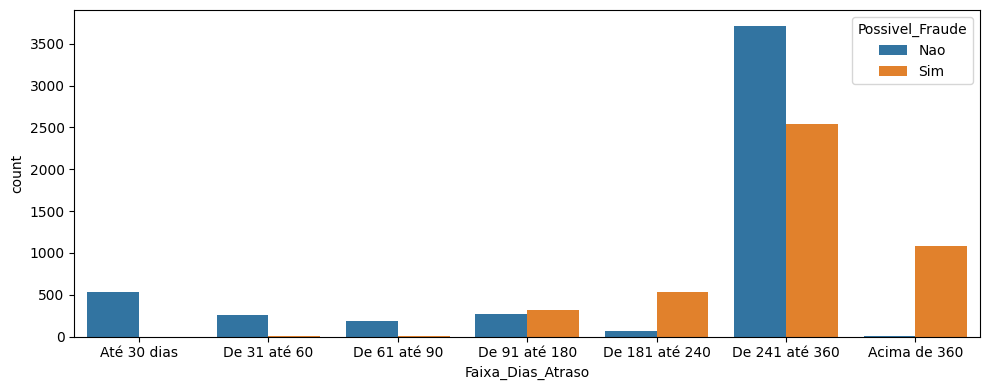

In [ ]:
#Podemos observar o volume de cotas que geraram prejuízo na arrecadação de taxa de administracao
#Essa variável iremos manter no modelo e avaliar mais adiante
sns.countplot(data= df_dados, x='Faixa_Dias_Atraso', hue='Possivel_Fraude');

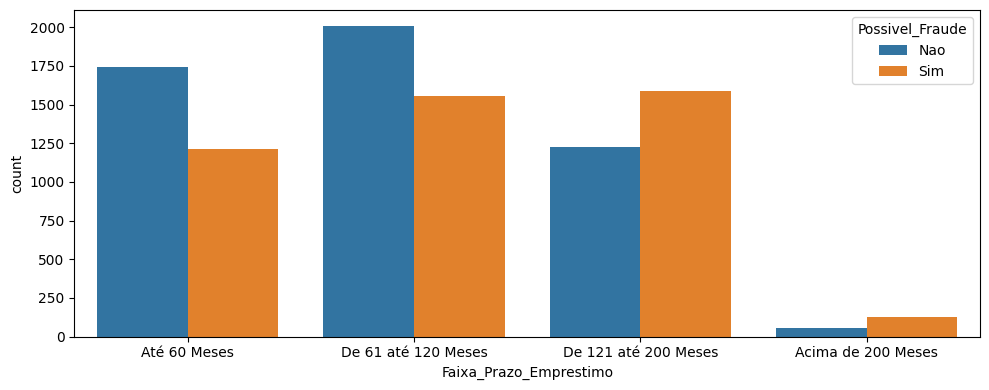

In [ ]:
sns.countplot(data= df_dados, x='Faixa_Prazo_Emprestimo', hue='Possivel_Fraude');

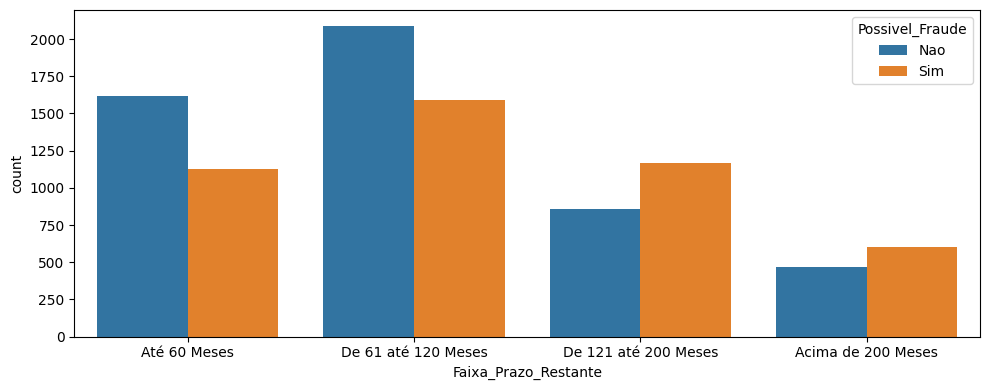

In [ ]:
# Podemos observar que não há discrepancias nestas variaveis.
sns.countplot(data= df_dados, x='Faixa_Prazo_Restante', hue='Possivel_Fraude');

In [ ]:
df_dados.describe()

,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00
mean,19.65,81881.89,94164.17,7.89,4.11,1.60,1.24,5.35,90560.27,8166.21
std,3.82,94138.06,108258.77,5.17,4.04,2.31,1.17,5.32,111050.54,16697.76
min,7.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,18546.85,1202.04
50%,20.00,50000.00,57500.00,9.00,2.00,1.00,1.00,4.00,45375.30,3949.91
75%,22.00,100000.00,115000.00,13.00,6.00,2.00,2.00,11.00,119721.25,8302.01
max,28.00,500000.00,575000.00,35.00,35.00,14.00,9.00,15.00,625000.00,396385.00


In [ ]:
# Total de valores únicos de cada variável do novo dataset
valores_unicos=[]
for i in df_dados.columns[0:19].tolist():
  print(i, ":", len(df_dados[i].astype(str).value_counts()))
  valores_unicos.append(len(df_dados[i].astype(str).value_counts()))

Sexo : 2
UF_Cliente : 27
Perc_Juros : 21
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 5
QT_Parcelas_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Faixa_Prazo_Restante : 4
Faixa_Salarial : 9
Faixa_Prazo_Emprestimo : 4
Faixa_Etaria : 6
Faixa_Dias_Atraso : 7
Possivel_Fraude : 2


#Analise Exploratória Variáveis Numéricas
1º = Conhecendo as variáveis

2º Realizar uma analise estatistica nas variáveis para futuros tratamentos. Sera avaliado média, mediana, moda, desvio padrão
correlações, outliers, distribuição dos dados, etc.

In [ ]:
Variaveis_numericas = []
for i in df_dados.columns[0:19].tolist():
  if df_dados.dtypes[i]=='int64' or df_dados.dtypes[i]=='float64':
    Variaveis_numericas.append(i)

In [ ]:
Variaveis_numericas

['Perc_Juros',
 'VL_Emprestimo',
 'VL_Emprestimo_ComJuros',
 'QT_Total_Parcelas_Pagas',
 'QT_Total_Parcelas_Pagas_EmDia',
 'QT_Total_Parcelas_Pagas_EmAtraso',
 'Qt_Renegociacao',
 'QT_Parcelas_Atraso',
 'Saldo_Devedor',
 'Total_Pago']

In [ ]:
#Verificando a quantidade de variáveis
len(Variaveis_numericas)

10

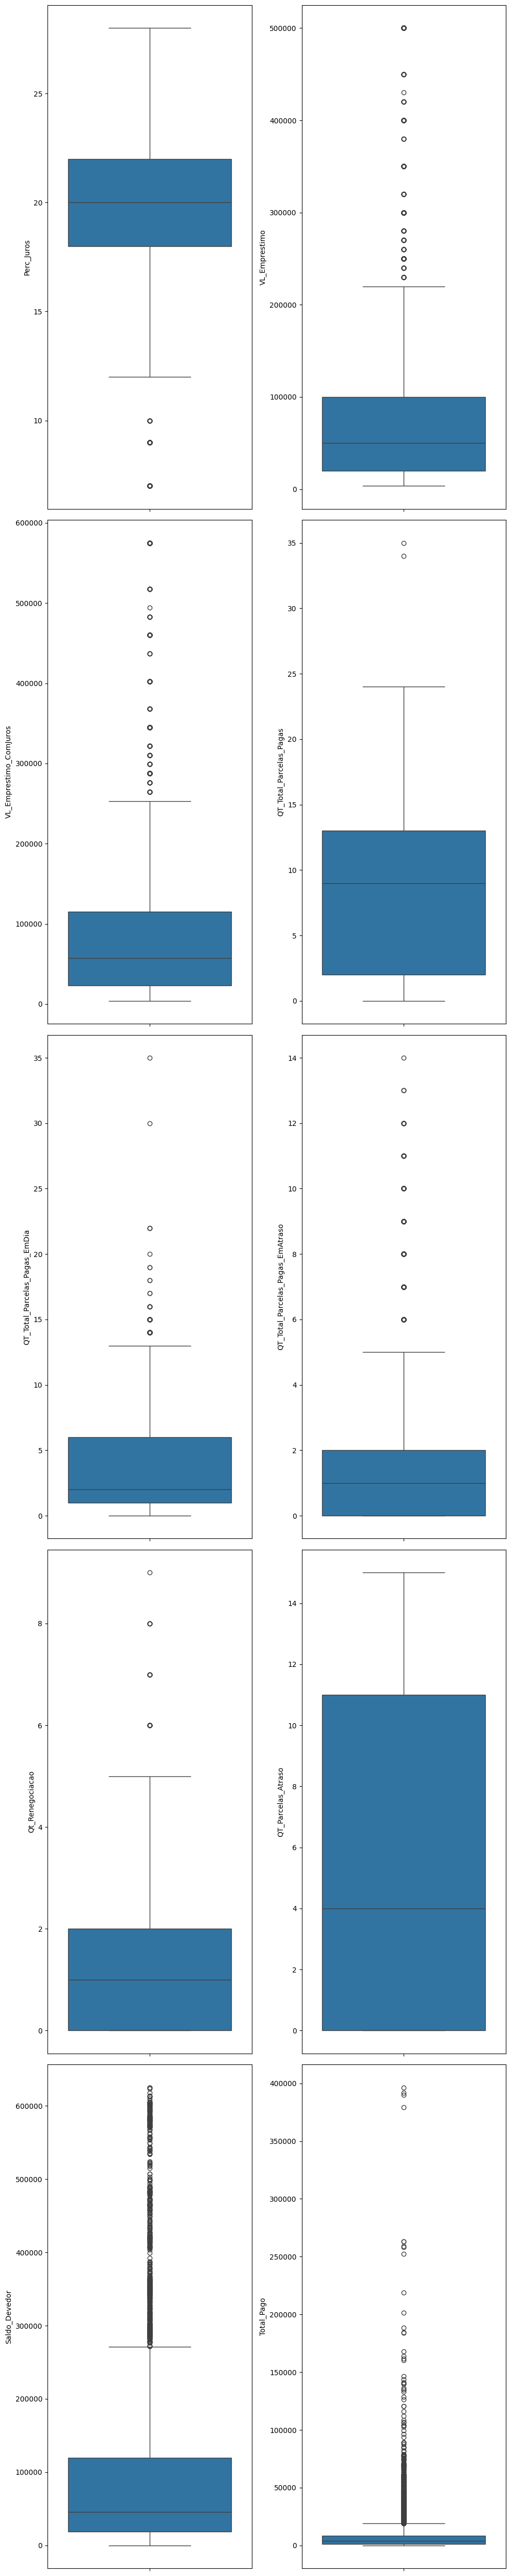

In [ ]:
#Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers.
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier.
plt.rcParams["figure.figsize"]=[10.00, 50.00]
plt.rcParams["figure.autolayout"]=True
f, axes = plt.subplots(5, 2)

linha = 0
coluna=0
for i in Variaveis_numericas:
  sns.boxplot(data=df_dados, y=i, ax=axes[linha][coluna])
  coluna +=1
  if coluna == 2:
    linha  += 1
    coluna = 0
plt.show()

In [ ]:
#Carregando variáveis categoricas para o OnehotEncodig.
# Vamos colocar o slice somente até a coluna de indice 18 para não pegar a variável target.
Variaveis_categoricas = []
for i in df_dados.columns[0:18].tolist():
  if df_dados.dtypes[i]=='object' or df_dados.dtypes[i]=='category':
    Variaveis_categoricas.append(i)

In [ ]:
# Visualizando as variaveis categoricas
Variaveis_categoricas

['Sexo',
 'UF_Cliente',
 'Estado_Civil',
 'Faixa_Prazo_Restante',
 'Faixa_Salarial',
 'Faixa_Prazo_Emprestimo',
 'Faixa_Etaria',
 'Faixa_Dias_Atraso']

In [ ]:
# Cria o encoder e aplica OneHotEncode
lb = LabelEncoder()


for var in Variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])

In [ ]:
df_dados.isnull().sum()

Sexo                                0
UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
Estado_Civil                        0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Prazo_Restante                0
Faixa_Salarial                      0
Faixa_Prazo_Emprestimo              0
Faixa_Etaria                        0
Faixa_Dias_Atraso                   0
Possivel_Fraude                     0
dtype: int64

In [ ]:
df_dados.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso,Possivel_Fraude
0,1,25,23.00,80000.00,92000.00,15,9,1,0,1,0,91759.97,7717.08,2,8,2,5,3,Nao
1,1,10,20.00,50000.00,57500.00,10,10,0,0,3,4,53981.18,6756.59,3,3,3,3,6,Nao
2,1,4,18.00,100000.00,115000.00,15,5,1,0,0,0,101150.02,17929.06,3,7,3,4,3,Nao
3,1,10,20.00,30000.00,34500.00,1,1,0,0,3,13,36208.10,369.10,3,3,3,1,0,Sim
4,1,10,20.00,60000.00,69000.00,16,16,0,0,0,0,60984.00,11845.24,3,5,3,2,3,Nao


In [ ]:
# Visualizando os tipos das variaveis
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sexo                              9517 non-null   int64  
 1   UF_Cliente                        9517 non-null   int64  
 2   Perc_Juros                        9517 non-null   float64
 3   VL_Emprestimo                     9517 non-null   float64
 4   VL_Emprestimo_ComJuros            9517 non-null   float64
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64  
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64  
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64  
 8   Qt_Renegociacao                   9517 non-null   int64  
 9   Estado_Civil                      9517 non-null   int64  
 10  QT_Parcelas_Atraso                9517 non-null   int64  
 11  Saldo_Devedor                     9517 non-null   float64
 12  Total_

In [ ]:
# Visualiznado a quantidade da variavel target para balanceamento
variavel_target = df_dados.Possivel_Fraude.value_counts()
variavel_target

Nao    5035
Sim    4482
Name: Possivel_Fraude, dtype: int64

In [ ]:
#Separando as variáveis pre
PREDITORAS = df_dados.iloc[:, 0:18]
TARGET=df_dados.iloc[:, 18]

In [ ]:
# Visualizando as variaveis preditoras
PREDITORAS.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso
0,1,25,23.00,80000.00,92000.00,15,9,1,0,1,0,91759.97,7717.08,2,8,2,5,3
1,1,10,20.00,50000.00,57500.00,10,10,0,0,3,4,53981.18,6756.59,3,3,3,3,6
2,1,4,18.00,100000.00,115000.00,15,5,1,0,0,0,101150.02,17929.06,3,7,3,4,3
3,1,10,20.00,30000.00,34500.00,1,1,0,0,3,13,36208.10,369.10,3,3,3,1,0
4,1,10,20.00,60000.00,69000.00,16,16,0,0,0,0,60984.00,11845.24,3,5,3,2,3


In [ ]:
# Visualizando a variavel target
TARGET.head()

0    Nao
1    Nao
2    Nao
3    Sim
4    Nao
Name: Possivel_Fraude, dtype: object

In [ ]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
balanceador = SMOTE(random_state = seed)

# Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET)

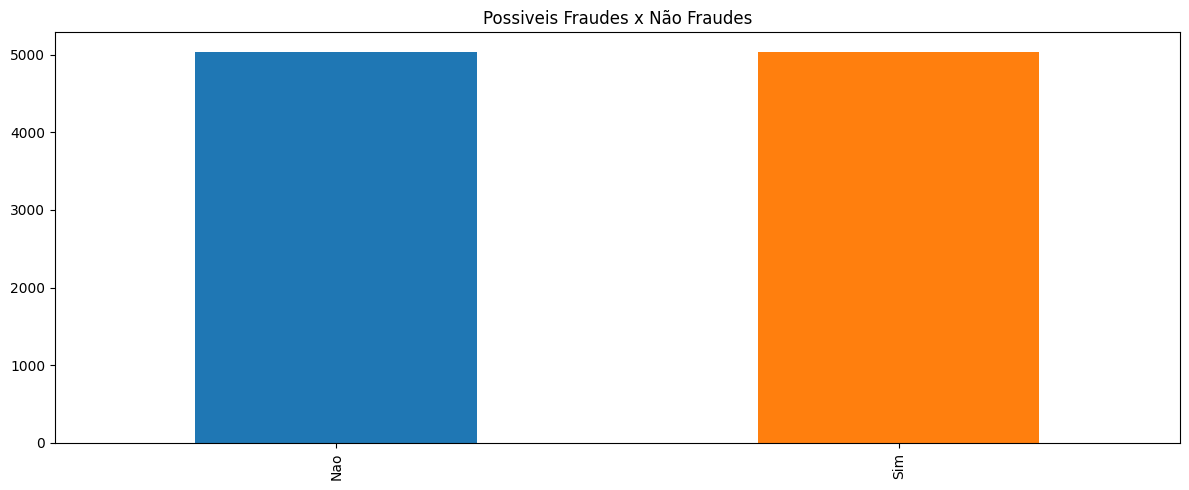

In [ ]:
# Visualizando o balanceamento da variável TARGET
plt.rcParams['figure.figsize']=[12.00, 5.00]
plt.rcParams['figure.autolayout'] = True
TARGET_RES.value_counts().plot(kind='bar', title='Possiveis Fraudes x Não Fraudes', color=['#1F77B4', '#FF7F0E']);

In [ ]:
# Quantidade de registros antes do balanceamento
PREDITORAS.shape

(9517, 18)

In [ ]:
# Quantidade de registros antes do balanceamento
TARGET.shape

(9517,)

In [ ]:
# Quantidade de registros após do balanceamento
PREDITORAS_RES.shape

(10070, 18)

In [ ]:
# Quantidade de registros após do balanceamento
TARGET_RES.shape

(10070,)

#Agora vamos dividir os dados em dados de treino e teste para iniciarmos a etapa de criação do modelo

In [ ]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS_RES, TARGET_RES, test_size = 0.3, random_state = 42)

In [ ]:
X_treino.shape

(7049, 18)

In [ ]:
X_treino.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso
7012,0,17,19.00,500000.00,575000.00,1,1,0,1,4,12,600296.26,1942.30,0,8,2,2,3
8541,0,25,20.00,140000.00,161000.00,5,3,1,1,0,8,167073.02,2485.00,0,7,2,2,2
3903,0,4,28.00,12000.00,13800.00,1,1,0,0,0,13,15717.44,332.66,1,7,1,3,0
1844,0,25,18.00,50000.00,57500.00,13,5,3,5,3,0,13084.40,26422.41,1,3,1,1,3
8303,1,9,21.00,15000.00,17250.00,13,3,4,1,3,0,14096.18,4423.11,1,7,1,3,3


In [ ]:
# Normalização das Variáveis
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.transform(X_teste)

In [ ]:
X_treino_normalizados.shape

(7049, 18)

In [ ]:
# Visualizando os dados NORMALIZADOS
X_treino_normalizados

array([[0.        , 0.65384615, 0.57142857, ..., 0.66666667, 0.4       ,
        0.5       ],
       [0.        , 0.96153846, 0.61904762, ..., 0.66666667, 0.4       ,
        0.33333333],
       [0.        , 0.15384615, 1.        , ..., 0.33333333, 0.6       ,
        0.        ],
       ...,
       [1.        , 0.96153846, 0.71428571, ..., 0.66666667, 0.6       ,
        0.5       ],
       [1.        , 0.88461538, 0.57142857, ..., 0.66666667, 1.        ,
        1.        ],
       [1.        , 0.96153846, 0.85714286, ..., 1.        , 1.        ,
        0.5       ]])

In [ ]:
#Fzendo a padronização dos dados
Padronizador = StandardScaler()
X_treino_padronizados = Padronizador.fit_transform(X_treino)
X_teste_padronizados = Padronizador.transform(X_teste)

In [ ]:
X_treino_padronizados

array([[-1.19716614,  0.23357709, -0.17570736, ..., -0.0233426 ,
        -0.94782947,  0.21145893],
       [-1.19716614,  1.30003966,  0.08623913, ..., -0.0233426 ,
        -0.94782947, -0.50688999],
       [-1.19716614, -1.49942459,  2.18181105, ..., -1.17398585,
        -0.23080329, -1.94358782],
       ...,
       [ 0.83530595,  1.30003966,  0.61013211, ..., -0.0233426 ,
        -0.23080329,  0.21145893],
       [ 0.83530595,  1.03342402, -0.17570736, ..., -0.0233426 ,
         1.20324906,  2.36650569],
       [ 0.83530595,  1.30003966,  1.39597158, ...,  1.12730065,
         1.20324906,  0.21145893]])

#Criando, Treinando e Avaliando os  Modelos de Machine Learning
#1º modelo Rondom Forest

In [ ]:
# Construindo do Modelo
randomForest = RandomForestClassifier()

In [ ]:
# Parametros default
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Valores para o grid de hiperparametros
n_estimators = np.array([100,200,300])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])


# Grid de hiperparâmetros
grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

# Criando o modelo com o Grid de Hiperparametros
randomForest = GridSearchCV(randomForest, grid_parametros, cv = 3, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
randomForest.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_rf = pd.DataFrame(randomForest.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])

Acurácia em Treinamento: 99.23%

Hiperparâmetros Ideais: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Tempo de Treinamento do Modelo:  789.76

Numero de treinamentos realizados:  324


In [ ]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 100, criterion = 'entropy', max_depth = 20,
                             max_features = 'log2', min_samples_leaf = 2, min_samples_split = 2, n_jobs = 8)

# Construção do modelo
clf = clf.fit(X_treino_normalizados, Y_treino)

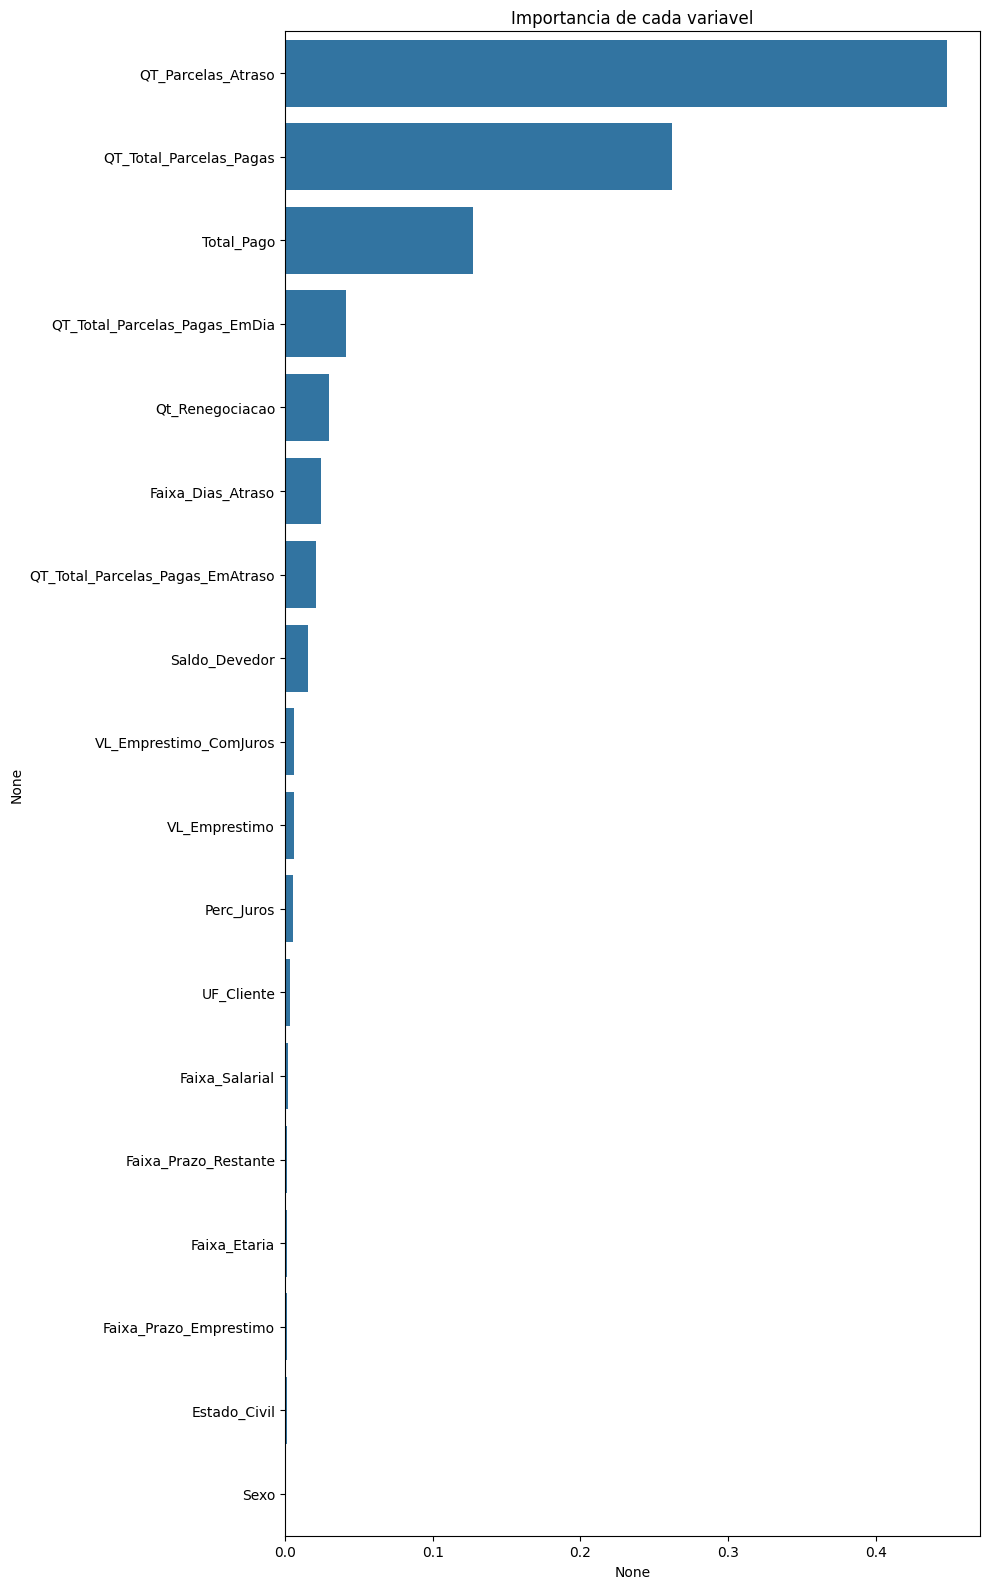

In [ ]:
# Exibindo a importancia de cada variavel no modelo preditivo
plt.rcParams["figure.figsize"]=[10.00, 16.00]
plt.rcParams["figure.autolayout"]=True

var_importante = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
var_importante = var_importante.sort_values(ascending = False)
sns.barplot(x=var_importante, y=var_importante.index, orient='h').set_title('Importancia de cada variavel')
plt.show()

In [ ]:
# Visualizando o percentual de importancia de cada variável
var_importante.sort_values(ascending= False)

QT_Parcelas_Atraso                 0.45
QT_Total_Parcelas_Pagas            0.26
Total_Pago                         0.13
QT_Total_Parcelas_Pagas_EmDia      0.04
Qt_Renegociacao                    0.03
Faixa_Dias_Atraso                  0.02
QT_Total_Parcelas_Pagas_EmAtraso   0.02
Saldo_Devedor                      0.02
VL_Emprestimo_ComJuros             0.01
VL_Emprestimo                      0.01
Perc_Juros                         0.01
UF_Cliente                         0.00
Faixa_Salarial                     0.00
Faixa_Prazo_Restante               0.00
Faixa_Etaria                       0.00
Faixa_Prazo_Emprestimo             0.00
Estado_Civil                       0.00
Sexo                               0.00
dtype: float64

In [ ]:
#"simulando" os dados de teste
scores = clf.score(X_treino_normalizados, Y_treino)
scores

0.9987232231522202

In [ ]:
#"simulando" os dados de teste
scores = clf.score(X_teste_normalizados, Y_teste)
scores

0.9894074809665674

In [ ]:
modelo_rf = {'Melhores Hiperparamentros': randomForest.best_params_,
             'Numero de Modelos Treinados': treinos_rf.shape[0],
             'Melhor Score': str(round(randomForest.best_score_ * 100))+"%"}

#2º construindo o modelo SVM

In [ ]:
# Construtor do modelo
modelo_svm = SVC()

In [ ]:
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# Valores para o grid de hiperparametros
grid_parametros = {'C': [0.1,1,10,100],
                   'gamma': [1,0.1,0.01,0.001],
                   #'kernel': ['poly','rbf','sigmoid','linear'],
                   'degree' : [2,3,4,],
                   'coef0' : [0.5,1],
                   #'decision_function_shape':['ovo', 'ovr'],
                   'max_iter': [-1, 1]}


svm = GridSearchCV(modelo_svm, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
svm.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_svm = pd.DataFrame(svm.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {svm.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {svm.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_svm.shape[0])

Acurácia em Treinamento: 98.92%

Hiperparâmetros Ideais: {'C': 100, 'coef0': 0.5, 'degree': 2, 'gamma': 0.01, 'max_iter': -1}

Tempo de Treinamento do Modelo:  289.86

Numero de treinamentos realizados:  192


In [ ]:
# Dicionário de métricas e metadados
modelo_svm = {'Melhores Hiperparametros':svm.best_params_,
               'Numero de Modelos Treinados': treinos_svm.shape[0],
               'Melhor Score': str(round(svm.best_score_ * 100,2))+"%"}

In [ ]:
#Classificador
knn = KNeighborsClassifier()

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#3º modelo de KNN

In [ ]:
# Valores para o grid de hiperparametros
n_neighbors = np.array([3,4,5,6,7])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
leaf_size = np.array([30,31,32])
metric =  np.array(['minkowski','euclidean'])


# Grid de hiperparâmetros
grid_parametros = dict(n_neighbors = n_neighbors,
                       algorithm = algorithm,
                       leaf_size = leaf_size,
                       metric = metric)

knn = GridSearchCV(knn, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
knn.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_knn = pd.DataFrame(knn.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {knn.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {knn.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_knn.shape[0])

Acurácia em Treinamento: 96.99%

Hiperparâmetros Ideais: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 7}

Tempo de Treinamento do Modelo:  111.27

Numero de treinamentos realizados:  120


In [ ]:
# Dicionário de métricas e metadados
modelo_knn = {'Melhores Hiperparametros':knn.best_params_,
               'Numero de Modelos Treinados': treinos_knn.shape[0],
               'Melhor Score': str(round(knn.best_score_ * 100,2))+"%"}

In [ ]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
resumo = pd.DataFrame({'Rondom Forest':pd.Series(modelo_rf),
                       'SVM':pd.Series(modelo_svm),
                       'KNN':pd.Series(modelo_knn)})

#Resumo do 1º 2º 3º modelo

In [ ]:
resumo

,Rondom Forest,SVM,KNN
Melhor Score,99%,98.92%,96.99%
Melhores Hiperparamentros,"{'criterion': 'entropy', 'max_depth': 10, 'max...",NaN,NaN
Melhores Hiperparametros,NaN,"{'C': 100, 'coef0': 0.5, 'degree': 2, 'gamma':...","{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
Numero de Modelos Treinados,324,192,120
